<a href="https://colab.research.google.com/github/ankit-rathi/Data-Science-with-Python/blob/master/Stock_Analysis/Nifty100_All_in_One_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas-ta
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 KB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=b5836941dd3c19f7fb5e2c34c50c56ffb494c1c6c1ae0241367fae41ac399b2e
  Stored in directory: /root/.cache/pip/wheels/54/4a/75/06b8e63fce6f6d2c1baae5c208edb18eca128407b0c96e1153
Successfully built pandas-ta
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.7 

In [14]:
import yfinance as yfin
yfin.pdr_override()
import pandas as pd
import pandas_ta as ta
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import plotly.graph_objs as go
import plotly
import plotly.subplots

def plot_all_in_one_indicators(stock):
  df = yfin.Ticker(stock).history(period='2y')[map(str.title, ['open', 'close', 'low', 'high', 'volume'])]
  # Force lowercase (optional)
  df.columns = [x.lower() for x in df.columns]
  # calculate MACD values
  df['200_ema'] = round(df['close'].ewm(span = 200, adjust = False).mean(),0) 
  df['50_ema'] = round(df['close'].ewm(span = 50, adjust = False).mean(),0) 
  df.ta.macd(close='close', fast=12, slow=26, signal=9, append=True)
  df.ta.eom(append=True)
  df.ta.rsi(append=True)
  df.ta.stoch(append=True)

  df = df[df.index >= '2022-01-01']
  df['50'] = 50
  df['20'] = 20
  df['80'] = 80
  # Force lowercase (optional)
  df.columns = [x.lower() for x in df.columns]
  # Construct a 2 x 1 Plotly figure
  fig = plotly.subplots.make_subplots(rows=5, cols=1)
  # price Line
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['close'],
          line=dict(color='#0000ff', width=1),
          name='price',
          # showlegend=False,
          # legendgroup='1',
      ), row=1, col=1
  )
  # EMA 200
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['200_ema'],
          line=dict(color='#000000', width=2),
          name='200 ema',
          # showlegend=False,
          # legendgroup='2',
      ), row=1, col=1
  )
  # EMA 50
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['50_ema'],
          line=dict(color='#ff9900', width=2),
          name='50 ema',
          # showlegend=False,
          # legendgroup='2',
      ), row=1, col=1
  )
  # STOCH Fast Signal (%k)
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['stochk_14_3_3'],
          line=dict(color='#ff9900', width=2),
          name='stochk',
          # showlegend=False,
          # legendgroup='2',
      ), row=2, col=1
  )
  # STOCH Slow signal (%d)
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['stochd_14_3_3'],
          line=dict(color='#000000', width=2),
          # showlegend=False,
          # legendgroup='2',
          name='stochd'
      ), row=2, col=1
  )

  # STOCH upper band
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['80'],
          line=dict(color='#808080', width=1),
          # showlegend=False,
          # legendgroup='2',
          name='stochd'
      ), row=2, col=1
  )
  # STOCH lower band
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['20'],
          line=dict(color='#808080', width=1),
          # showlegend=False,
          # legendgroup='2',
          name='stochd'
      ), row=2, col=1
  )
    # RSI
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['rsi_14'],
          line=dict(color='#00ff00', width=2),
          name='rsi',
          # showlegend=False,
          legendgroup='2',
      ), row=3, col=1
  )
  # RSI threshold
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['50'],
          line=dict(color='#808080', width=1),
          # name='rsi',
          # showlegend=False,
          legendgroup='2',
      ), row=3, col=1
  )


  # MACD Fast Signal (%k)
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['macd_12_26_9'],
          line=dict(color='#ff9900', width=2),
          name='macd',
          # showlegend=False,
          # legendgroup='2',
      ), row=4, col=1
  )
  # MACD Slow signal (%d)
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['macds_12_26_9'],
          line=dict(color='#000000', width=2),
          # showlegend=False,
          # legendgroup='2',
          name='signal'
      ), row=4, col=1
  )
  # Colorize the histogram values
  colors = np.where(df['macdh_12_26_9'] < 0, '#000', '#ff9900')
  # MACD Plot the histogram
  fig.append_trace(
      go.Bar(
          x=df.index,
          y=df['macdh_12_26_9'],
          name='histogram',
          marker_color=colors,
      ), row=4, col=1
  )
  # EOM
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['eom_14_100000000'],
          line=dict(color='#ff0000', width=2),
          name='eom',
          # showlegend=False,
          legendgroup='2',
      ), row=5, col=1
  )
  # Make it pretty
  layout = go.Layout(
      plot_bgcolor='#efefef',
      # Font Families
      font_family='Monospace',
      font_color='#000000',
      font_size=12,
      width=1500, 
      height=1200,
      xaxis=dict(
          rangeslider=dict(
              visible=False
          )
      )
  )
  # Update options and show plot
  fig.update_layout(layout)
  fig.show()

stock = 'DIVISLAB.NS'
plot_all_in_one_indicators(stock)

In [25]:
def get_all_in_one_indicators(stock):
  df = yfin.Ticker(stock).history(period='2y')[map(str.title, ['open', 'close', 'low', 'high', 'volume'])]
  # Force lowercase (optional)
  df.columns = [x.lower() for x in df.columns]
  # calculate MACD values
  df['200_ema'] = round(df['close'].ewm(span = 200, adjust = False).mean(),0) 
  df['50_ema'] = round(df['close'].ewm(span = 50, adjust = False).mean(),0) 
  df.ta.macd(close='close', fast=12, slow=26, signal=9, append=True)
  df.ta.eom(append=True)
  df.ta.rsi(append=True)
  df.ta.stoch(append=True)

  df = df[df.index >= '2022-01-01']
  df['50'] = 50
  df['20'] = 20
  df['80'] = 80
  # Force lowercase (optional)
  df.columns = [x.lower() for x in df.columns]
  
  cols =  ['close','volume', '200_ema', '50_ema',
       'macd_12_26_9', 'macdh_12_26_9', 'macds_12_26_9', 'eom_14_100000000',
       'rsi_14', 'stochk_14_3_3', 'stochd_14_3_3']

  return df[cols]

stock = 'TITAN.NS'
df = get_all_in_one_indicators(stock)
df[(df['rsi_14'] < 30) | (df['rsi_14'] > 75) ]

,close,volume,200_ema,50_ema,macd_12_26_9,macdh_12_26_9,macds_12_26_9,eom_14_100000000,rsi_14,stochk_14_3_3,stochd_14_3_3
Date,,,,,,,,,,,
2022-05-06 00:00:00+05:30,2200.963623,1465638,2286.0,2463.0,-58.073283,-29.712735,-28.360548,-65255.662030,29.245257,4.135394,8.464563
2022-05-09 00:00:00+05:30,2175.503662,968069,2285.0,2451.0,-70.098137,-33.390071,-36.708066,-65404.138870,28.009144,3.404278,4.354913
2022-05-10 00:00:00+05:30,2129.815430,1092429,2283.0,2439.0,-82.365125,-36.525647,-45.839478,-95594.127198,25.894029,3.273583,3.604418
2022-05-11 00:00:00+05:30,2107.245117,1472911,2282.0,2426.0,-92.837860,-37.598706,-55.239154,-98647.723741,24.893925,3.414720,3.364194
2022-05-12 00:00:00+05:30,2041.328369,1362031,2279.0,2411.0,-105.243329,-40.003340,-65.239989,-125695.568564,22.197477,3.186595,3.291633
2022-05-13 00:00:00+05:30,2084.326172,2580348,2277.0,2398.0,-110.333335,-36.074677,-74.258659,-118606.713270,27.698944,5.845880,4.149065
2022-05-16 00:00:00+05:30,2102.163330,1370151,2276.0,2386.0,-111.640965,-29.905845,-81.735120,-98504.099864,29.912990,9.239912,6.090796
2022-06-17 00:00:00+05:30,1929.623413,6066708,2245.0,2225.0,-56.083565,-10.312344,-45.771221,-55272.062041,26.855712,9.236223,11.088987
2022-08-03 00:00:00+05:30,2416.399902,1207016,2222.0,2210.0,78.360415,14.889788,63.470627,63182.069353,75.162627,95.517560,92.932816


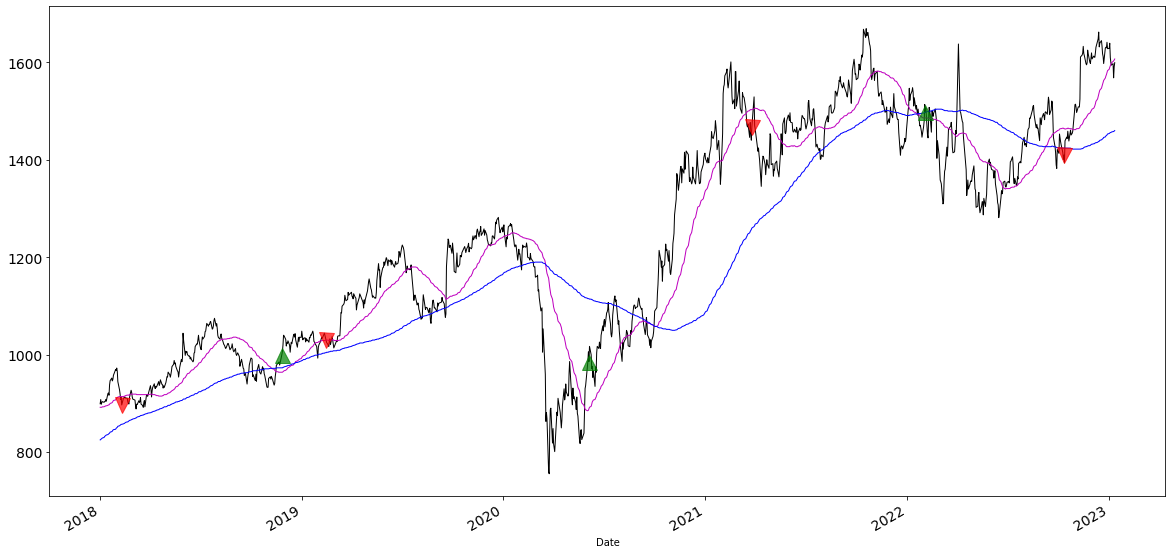

In [4]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def get_buy_sell_recomm(stock):

  df = yfin.Ticker(stock).history(period='6y')[map(str.title, ['open', 'close', 'low', 'high', 'volume'])]
  # Force lowercase (optional)
  # df.columns = [x.lower() for x in df.columns]
  # calculate MACD values
  df['200_SMA'] = round(df['Close'].rolling(window = 200, min_periods = 1).mean(),0) 
  df['50_SMA'] = round(df['Close'].rolling(window = 50, min_periods = 1).mean(),0) 
  #df.ta.macd(close='close', fast=36, slow=78, signal=27, append=True)
  df.ta.eom(append=True)
  df.ta.rsi(append=True)
  df['Dev%_200'] = round((df['Close'] - df['200_SMA'])*100/df['200_SMA'],2)
  df['200_SMA_Lag10'] = df['200_SMA'].shift(10)
  df['Slope%_200'] = round((df['200_SMA'] - df['200_SMA_Lag10'])*100/df['200_SMA'],2)
  df['50_SMA_Lag5'] = df['50_SMA'].shift(5)
  df['Slope%_50'] = round((df['50_SMA'] - df['50_SMA_Lag5'])*100/df['50_SMA'],2)

  df['Signal'] = 'Hold'
  df.loc[ (abs(df['Slope%_50']) <= .2) & (df['200_SMA'] < df['50_SMA']) & (df['Close'] < df['50_SMA']) , 'Signal'] = 'Sell'
  df.loc[ (abs(df['Slope%_50']) <= .2) & (df['200_SMA'] > df['50_SMA']) & (df['Close'] > df['50_SMA']), 'Signal'] = 'Buy'


  df.drop(['Open', 'Low', 'High', 'Volume','200_SMA_Lag10','50_SMA_Lag5'], axis=1, inplace=True) 

  df = df[df.index >= '2018-01-01']

  # plot close price, short-term and long-term moving averages
  plt.figure(figsize = (20,10))
  plt.tick_params(axis = 'both', labelsize = 14)
  df['Close'].plot(color = 'k', lw = 1, label = 'Close')  
  df['50_SMA'].plot(color = 'm', lw = 1, label = '50_SMA')
  df['200_SMA'].plot(color = 'b', lw = 1, label = '200_SMA') 

  tmp = df[df['Signal'] != 'Hold']
  tmp['Prev_Signal'] = tmp['Signal'].shift(1)
  tmp['Recomm'] = tmp['Signal']
  tmp.loc[ (tmp['Signal'] == tmp['Prev_Signal']) , 'Recomm'] = 'Hold'
  tmp = tmp[tmp['Recomm'] != 'Hold']

  # plot 'buy' signals
  plt.plot(tmp[tmp['Recomm'] == 'Buy'].index, 
          tmp[tmp['Recomm'] == 'Buy']['Close'], 
          '^', markersize = 15, color = 'g', alpha = 0.7, label = 'buy')

  # plot 'sell' signals
  plt.plot(tmp[tmp['Recomm'] == 'Sell'].index, 
          tmp[tmp['Recomm'] == 'Sell']['Close'], 
          'v', markersize = 15, color = 'r', alpha = 0.7, label = 'sell')
  #return tmp
  
stock = 'HDFCBANK.NS'
get_buy_sell_recomm(stock)